# Brunnen Zürich - Water fountains in Zürich

Data source: https://www.stadt-zuerich.ch/geodaten/download/Brunnen?format=10008

https://www.stadt-zuerich.ch/portal/de/index/ogd/anwendungen/2019/Water-fountains.html

The dataset includes fountains of the water supply and other service departments of the city of Zürich, as well as private fountains.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
pd.set_option("max_columns", 50) # to be able to see all the columns

## Read geoJSON data and create data frame

In [2]:
brunnen_df = gpd.read_file('https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Brunnen?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=wvz_brunnen')

## Explore the dataset

### First look

In [3]:
brunnen_df.shape

(1280, 32)

In [4]:
brunnen_df.head()

,id,abgestellt,architekt_bildhauer,art,art_eigentuemer,baujahr,bemerkung1,bemerkung2,brunnenart,brunnennummer,datum_abstellung,datum_aenderung,datum_wiederinbetriebnahme,druckzone,eigentuemer,foto,grund_abstellung,historisches_baujahr,hkoord,material_figur,material_saeule,material_trog,objectid,ortsbezeichnung,quartier,stadtkreis,standort,steinhauer,u_aks_nummer,vkoord,wasserart,geometry
0,wvz_brunnen.1,nein,None,Notwasserbrunnen,öffentlich,1985.0,None,None,Notwasserbrunnen,6061,NaT,202212052235,None,Brunnennetz,WVZ,https://wvzm0gib.global.szh.loc/Brunnenbilder/...,None,1986.0,2685636.345,None,None,Bronzeguss,1.0,None,Schwamendingen,12,Stettbachweg-/Winterthurerstrasse,None,{AC762A2C-760A-489A-9F28-68B0196B799E},1250981.102,Quellwasser,POINT (8.57317 47.40408)
1,wvz_brunnen.2,nein,None,Notwasserbrunnen,öffentlich,1981.0,None,None,Notwasserbrunnen,6046,NaT,202212052235,None,Brunnennetz,WVZ,https://wvzm0gib.global.szh.loc/Brunnenbilder/...,None,1983.0,2685567.159,None,None,Bronzeguss,2.0,None,Schwamendingen,12,Aubrugg-/Ueberlandstrasse,None,{0A531BDE-1B43-45CA-BEBB-D1707FB59C4A},1251726.383,Quellwasser,POINT (8.57239 47.41079)
2,wvz_brunnen.3,nein,None,Notwasserbrunnen,öffentlich,1982.0,None,None,Notwasserbrunnen,6053,NaT,202212052235,None,Brunnennetz,WVZ,https://wvzm0gib.global.szh.loc/Brunnenbilder/...,None,1985.0,2686489.351,None,None,Bronzeguss,3.0,None,Schwamendingen,12,Dübendorf-/Eichackerstrasse,None,{44A258C7-A2CA-48B4-AE61-26AFD105C9B3},1250617.263,Quellwasser,POINT (8.58440 47.40070)
3,wvz_brunnen.4,nein,None,Notwasserbrunnen,öffentlich,1978.0,None,None,Notwasserbrunnen,6018,NaT,202212052235,None,Brunnennetz,WVZ,https://wvzm0gib.global.szh.loc/Brunnenbilder/...,None,1978.0,2685327.613,None,None,Bronzeguss,4.0,None,Schwamendingen,12,Friedrich-/Saatlenstrasse,None,{ACCB570A-F62D-4207-904B-F317B4BCA47A},1251157.765,Quellwasser,POINT (8.56911 47.40571)
4,wvz_brunnen.5,nein,None,Notwasserbrunnen,öffentlich,1978.0,None,None,Notwasserbrunnen,6055,NaT,202212052235,None,Brunnennetz,WVZ,https://wvzm0gib.global.szh.loc/Brunnenbilder/...,None,1985.0,2683697.522,None,None,Bronzeguss,5.0,None,Affoltern/Oerlikon/Seebach,11,Hirschwiesenstr./b. Hirschgartnerweg 36,None,{1ED203DC-76EA-4AB5-B9B9-4E3709A4226F},1250547.185,Quellwasser,POINT (8.54740 47.40043)


In [5]:
brunnen_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          1280 non-null   object        
 1   abgestellt                  1280 non-null   object        
 2   architekt_bildhauer         432 non-null    object        
 3   art                         1280 non-null   object        
 4   art_eigentuemer             1278 non-null   object        
 5   baujahr                     868 non-null    float64       
 6   bemerkung1                  115 non-null    object        
 7   bemerkung2                  17 non-null     object        
 8   brunnenart                  749 non-null    object        
 9   brunnennummer               1280 non-null   object        
 10  datum_abstellung            13 non-null     datetime64[ns]
 11  datum_aenderung             1280 non-null   obje

<AxesSubplot:>

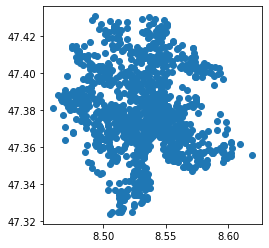

In [6]:
brunnen_df.plot()

### Columns of interest

In [7]:
# see all columns
brunnen_df.columns

Index(['id', 'abgestellt', 'architekt_bildhauer', 'art', 'art_eigentuemer',
       'baujahr', 'bemerkung1', 'bemerkung2', 'brunnenart', 'brunnennummer',
       'datum_abstellung', 'datum_aenderung', 'datum_wiederinbetriebnahme',
       'druckzone', 'eigentuemer', 'foto', 'grund_abstellung',
       'historisches_baujahr', 'hkoord', 'material_figur', 'material_saeule',
       'material_trog', 'objectid', 'ortsbezeichnung', 'quartier',
       'stadtkreis', 'standort', 'steinhauer', 'u_aks_nummer', 'vkoord',
       'wasserart', 'geometry'],
      dtype='object')

#### id column

In [8]:
# any duplicates in the id column?
brunnen_df[brunnen_df.id.duplicated()]

,id,abgestellt,architekt_bildhauer,art,art_eigentuemer,baujahr,bemerkung1,bemerkung2,brunnenart,brunnennummer,datum_abstellung,datum_aenderung,datum_wiederinbetriebnahme,druckzone,eigentuemer,foto,grund_abstellung,historisches_baujahr,hkoord,material_figur,material_saeule,material_trog,objectid,ortsbezeichnung,quartier,stadtkreis,standort,steinhauer,u_aks_nummer,vkoord,wasserart,geometry


#### Unique values in certain columns
Let's see if they are useful or not.

In [9]:
brunnen_df.art.unique()

array(['Notwasserbrunnen', 'öffentlich', 'privat'], dtype=object)

In [10]:
brunnen_df[["art", "id"]].groupby(["art"]).count()

,id
art,
Notwasserbrunnen,88
privat,233
öffentlich,959


In [11]:
brunnen_df[["brunnenart", "id"]].groupby(["brunnenart"]).count()

,id
brunnenart,
Brunnen des Verschönerungsvereins,43
Brunnen in städtischer Liegenschaft,399
Notwasserbrunnen,87
privater Brunnen,220


"art" is more useful

In [12]:
brunnen_df[["id","material_trog"]].groupby(["material_trog"]).count().sort_values("id", ascending = False)

,id
material_trog,
Granit,121
Bronzeguss,79
Beton,76
Kunststein,41
Kalkstein,37
...,...
"Iragnagranit, hell",1
"Iragnagranit, hell (Modell Schäfer)",1
Istrischer Kalkstein,1


not useful

In [13]:
brunnen_df[["id","wasserart"]].groupby(["wasserart"]).count().sort_values("id", ascending = False)

,id
wasserart,
Züriwasser,813
Quellwasser,432
eigene Versorgung,31
Grundwasser,4


could be interesting

## Create new data frame from selected columns

### Create brunnen_final and rename columns

In [14]:
# create final data frame
brunnen_final = brunnen_df[["id", "art", "baujahr", "eigentuemer", "quartier", "stadtkreis", "standort", "wasserart", "geometry"]]

In [15]:
# rename columns using English names
brunnen_final = brunnen_final.rename(columns = {"id" : "ID", 
                                             "art": "type",
                                             "baujahr" : "year_built",
                                             "eigentuemer" : "owner",
                                             "quartier" : "quartier",
                                             "stadtkreis" : "district_no",
                                             "standort" : "location",
                                             "wasserart" : "water_type",
                                             "geometry" : "geometry"
                                            })

In [16]:
# check the new dataset
brunnen_final.head()

,ID,type,year_built,owner,quartier,district_no,location,water_type,geometry
0,wvz_brunnen.1,Notwasserbrunnen,1985.0,WVZ,Schwamendingen,12,Stettbachweg-/Winterthurerstrasse,Quellwasser,POINT (8.57317 47.40408)
1,wvz_brunnen.2,Notwasserbrunnen,1981.0,WVZ,Schwamendingen,12,Aubrugg-/Ueberlandstrasse,Quellwasser,POINT (8.57239 47.41079)
2,wvz_brunnen.3,Notwasserbrunnen,1982.0,WVZ,Schwamendingen,12,Dübendorf-/Eichackerstrasse,Quellwasser,POINT (8.58440 47.40070)
3,wvz_brunnen.4,Notwasserbrunnen,1978.0,WVZ,Schwamendingen,12,Friedrich-/Saatlenstrasse,Quellwasser,POINT (8.56911 47.40571)
4,wvz_brunnen.5,Notwasserbrunnen,1978.0,WVZ,Affoltern/Oerlikon/Seebach,11,Hirschwiesenstr./b. Hirschgartnerweg 36,Quellwasser,POINT (8.54740 47.40043)


### Extract latitude and longitude from geometry and add new columns

In [17]:
brunnen_final["longitude"] = brunnen_final["geometry"].x
brunnen_final["latitude"] = brunnen_final["geometry"].y

In [18]:
brunnen_final.head()

,ID,type,year_built,owner,quartier,district_no,location,water_type,geometry,longitude,latitude
0,wvz_brunnen.1,Notwasserbrunnen,1985.0,WVZ,Schwamendingen,12,Stettbachweg-/Winterthurerstrasse,Quellwasser,POINT (8.57317 47.40408),8.573166,47.404080
1,wvz_brunnen.2,Notwasserbrunnen,1981.0,WVZ,Schwamendingen,12,Aubrugg-/Ueberlandstrasse,Quellwasser,POINT (8.57239 47.41079),8.572392,47.410791
2,wvz_brunnen.3,Notwasserbrunnen,1982.0,WVZ,Schwamendingen,12,Dübendorf-/Eichackerstrasse,Quellwasser,POINT (8.58440 47.40070),8.584395,47.400696
3,wvz_brunnen.4,Notwasserbrunnen,1978.0,WVZ,Schwamendingen,12,Friedrich-/Saatlenstrasse,Quellwasser,POINT (8.56911 47.40571),8.569110,47.405709
4,wvz_brunnen.5,Notwasserbrunnen,1978.0,WVZ,Affoltern/Oerlikon/Seebach,11,Hirschwiesenstr./b. Hirschgartnerweg 36,Quellwasser,POINT (8.54740 47.40043),8.547402,47.400427


In [19]:
brunnen_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID           1280 non-null   object  
 1   type         1280 non-null   object  
 2   year_built   868 non-null    float64 
 3   owner        1277 non-null   object  
 4   quartier     1273 non-null   object  
 5   district_no  1276 non-null   object  
 6   location     1276 non-null   object  
 7   water_type   1280 non-null   object  
 8   geometry     1280 non-null   geometry
 9   longitude    1280 non-null   float64 
 10  latitude     1280 non-null   float64 
dtypes: float64(3), geometry(1), object(7)
memory usage: 110.1+ KB


## Write file

In [20]:
# write to csv
#brunnen_final.to_csv("Water_fountains_ZH.csv", index = False)

In [21]:
# write to geojson, use encoding = "utf-8" because of "ü"
brunnen_final.to_file("Water_fountains_ZH.geojson", driver = "GeoJSON", encoding = "utf-8")